# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # train.csv
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # test.csv
usage: gdown [-h] [-V] [-O OUTPUT] [-q] [--fuzzy] [--id] [--proxy PROXY]
             [--speed SPEED] [--no-cookies] [--no-check-certificate]
             [--continue] [--folder] [--remaining-ok] [--format FORMAT]
             [--user-agent USER_AGENT]
             url_or_id
gdown: error: unrecognized arguments: # submission.csv


In [4]:
data = pd.read_csv('./train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

In [7]:
data.describe()

,ClientPeriod,MonthlySpending,IsSeniorCitizen,Churn
count,5282.000000,5282.000000,5282.000000,5282.000000
mean,32.397009,64.924754,0.159409,0.262022
std,24.550326,30.176464,0.366092,0.439776
min,0.000000,18.250000,0.000000,0.000000
25%,9.000000,35.462500,0.000000,0.000000
50%,29.000000,70.400000,0.000000,0.000000
75%,55.000000,90.050000,0.000000,1.000000
max,72.000000,118.750000,1.000000,1.000000


In [8]:
data.TotalSpent = data.TotalSpent.str.strip()
data.TotalSpent = data.TotalSpent.replace('', np.nan)
data.TotalSpent = data.TotalSpent.astype('float64')

In [9]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  9
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [10]:
data.TotalSpent = data.TotalSpent.fillna(data.TotalSpent.mean())

In [11]:
data.isna().sum()

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64

In [12]:
data.duplicated().sum()

14

In [13]:
data = data.drop_duplicates()

In [14]:
data.ClientPeriod.value_counts()

ClientPeriod
1     443
72    284
2     165
3     162
4     136
     ... 
57     39
39     35
44     34
36     34
0       9
Name: count, Length: 73, dtype: int64

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*).

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

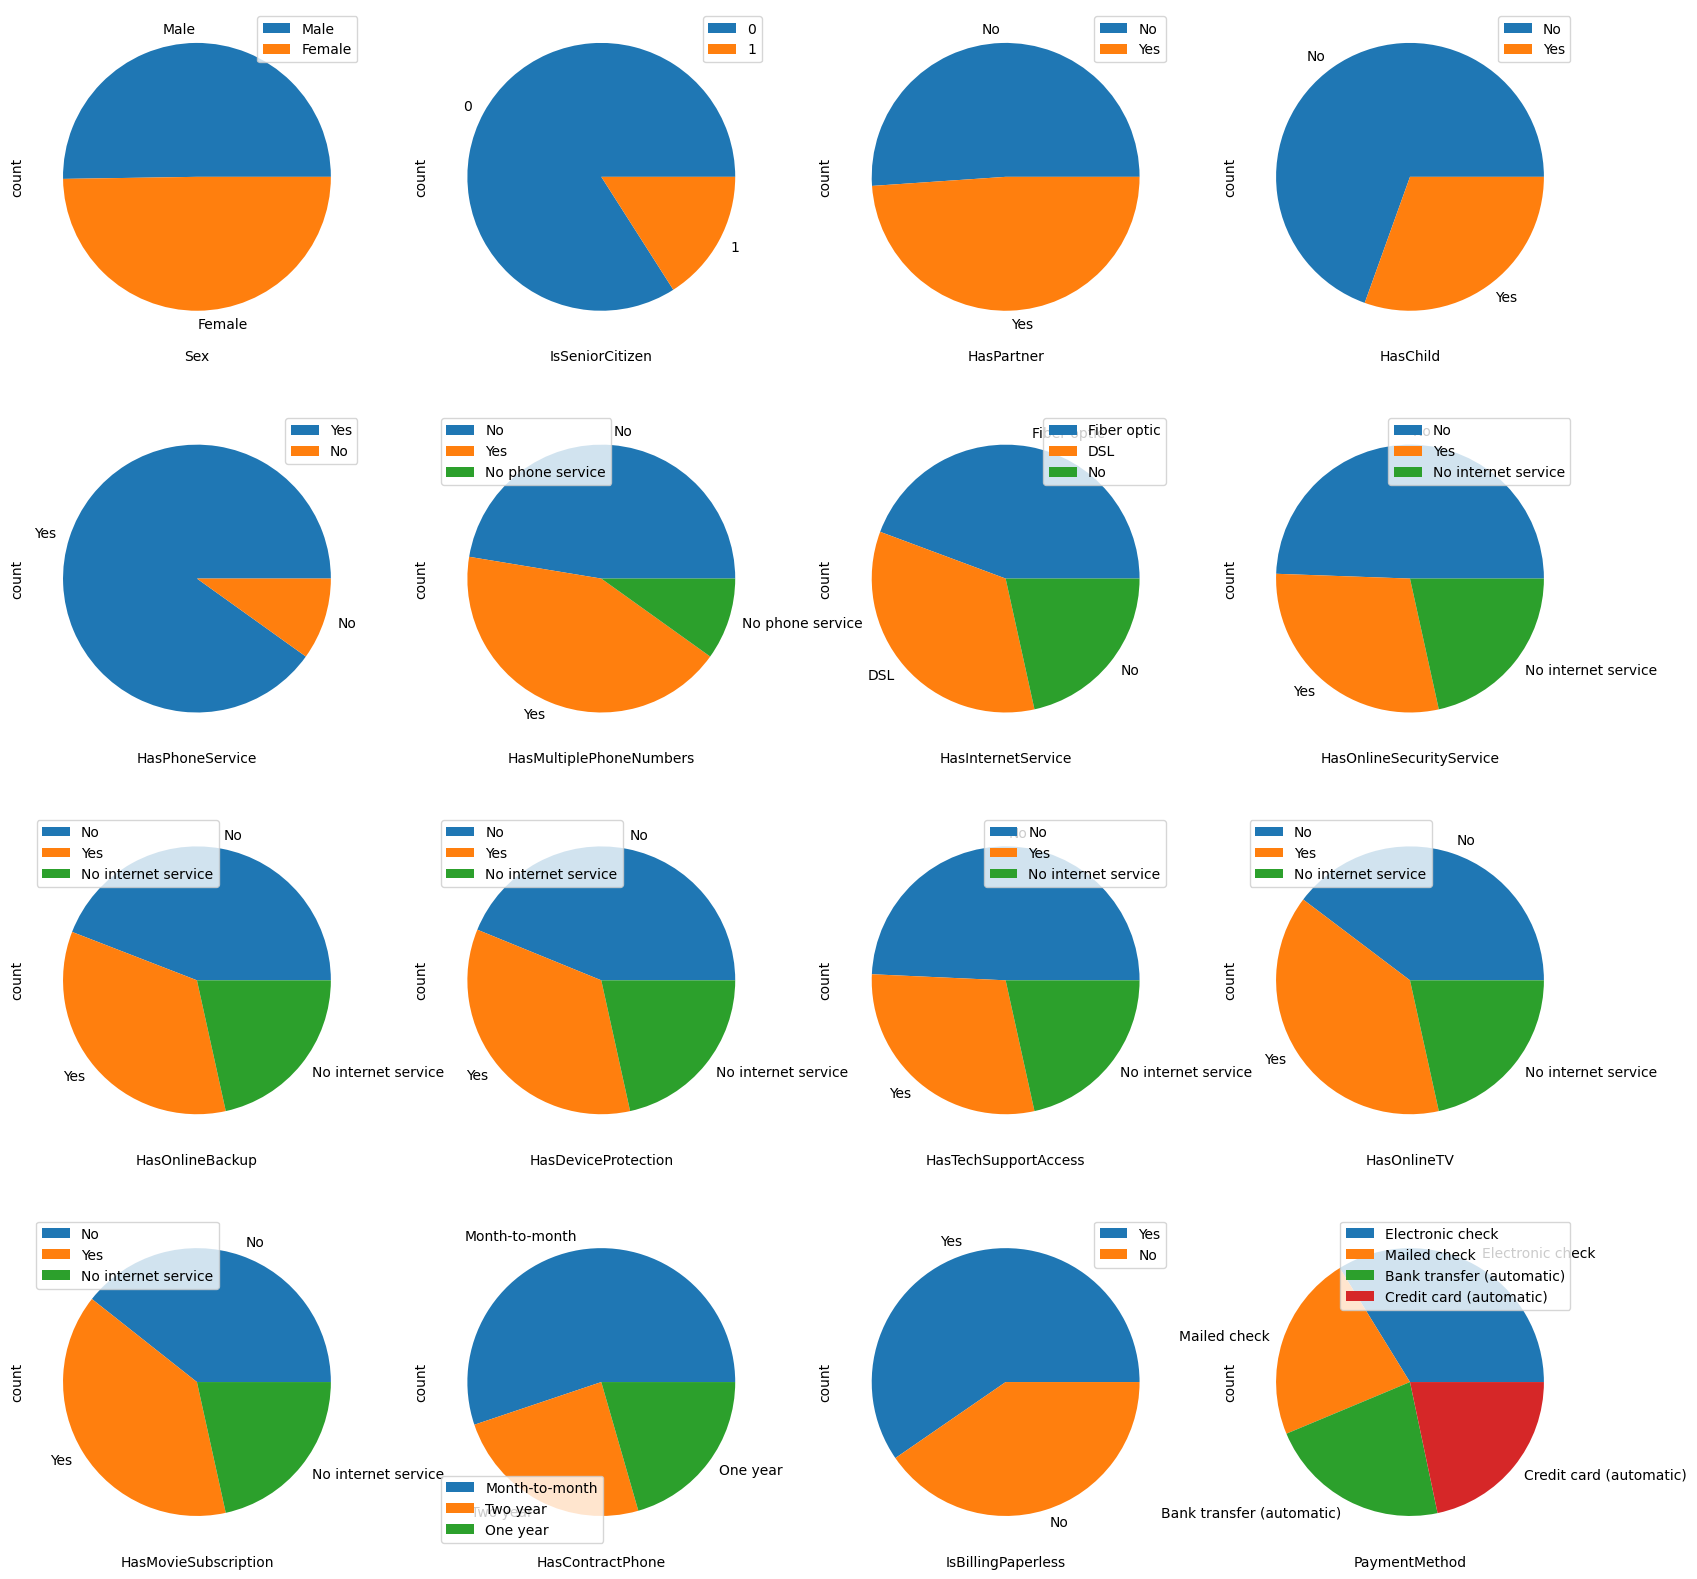

In [15]:
fig, axs = plt.subplots(4, 4, constrained_layout=False, figsize=(20, 20))
index = 0
for ax_id, ax in enumerate(axs):
    for id, sub in enumerate(axs):
        data[cat_cols[index]].value_counts().plot(
            kind='pie',
            ax = axs[ax_id, id]
        )
        axs[ax_id, id].legend()
        axs[ax_id, id].set_xlabel(data[cat_cols[index]].name)
        index += 1

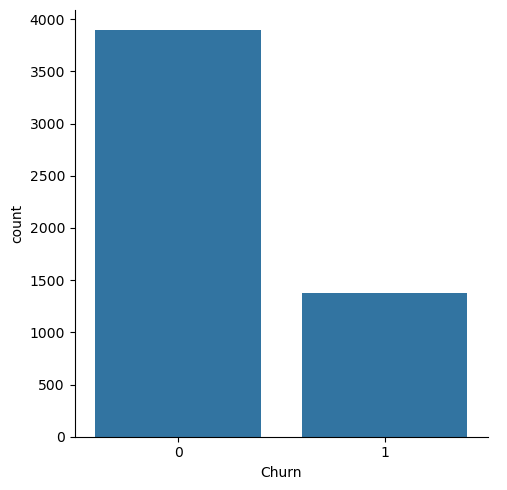

In [16]:
sns.catplot(data=data, x=target_col, kind='count')

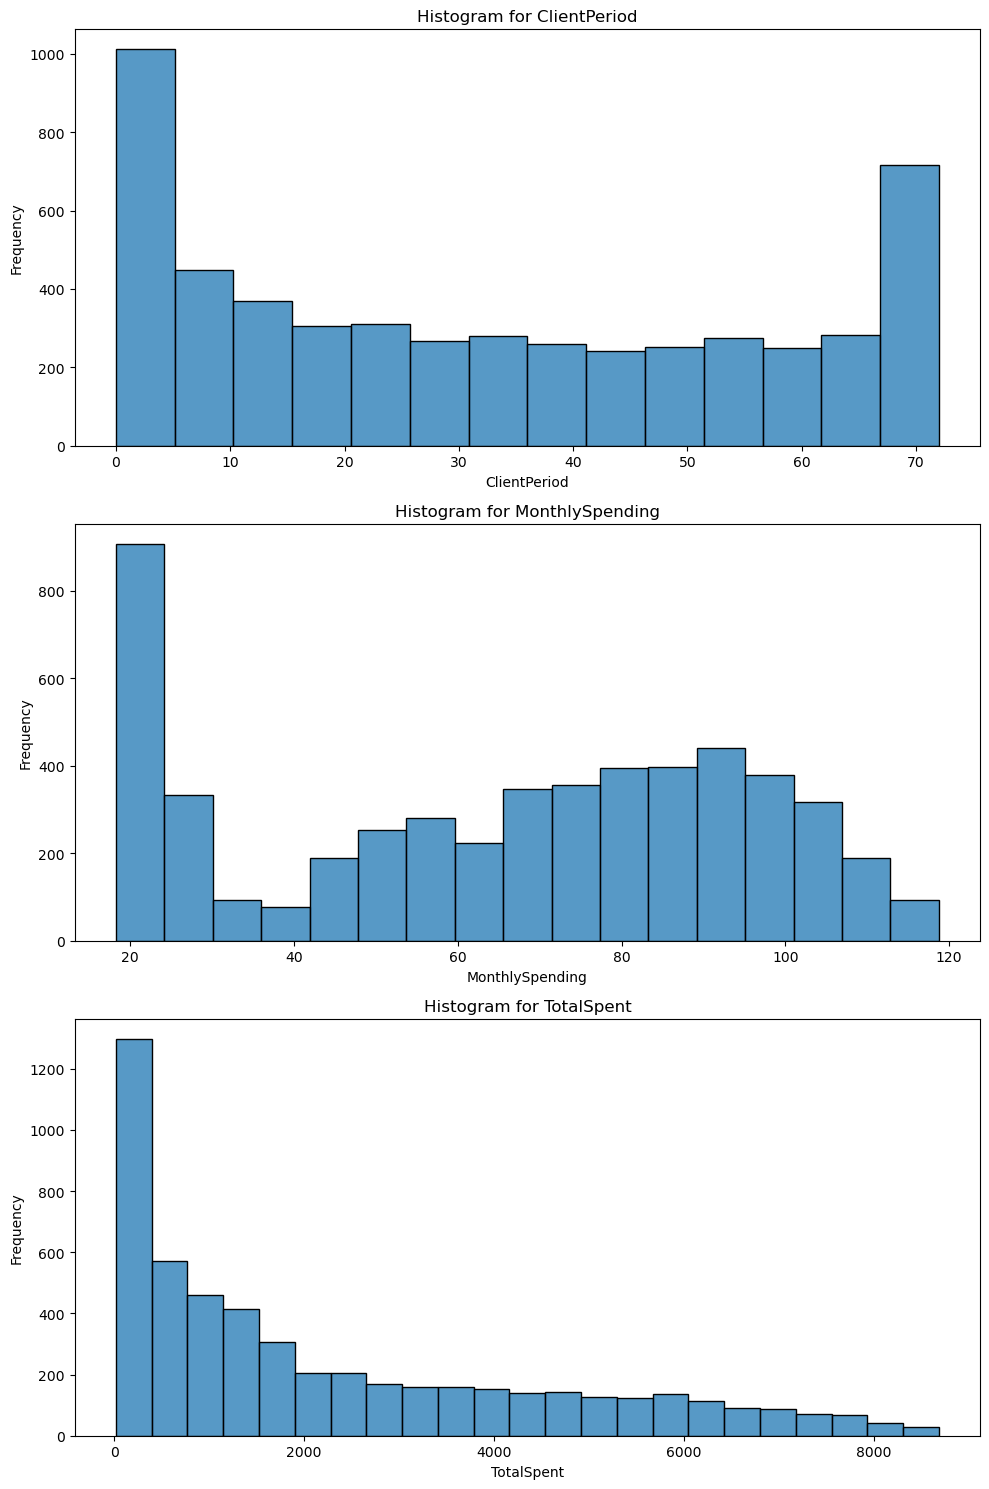

In [17]:
num_plots = len(num_cols)
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 5))

for ax, col in zip(axes, num_cols):
    sns.histplot(data[col], ax=ax)
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

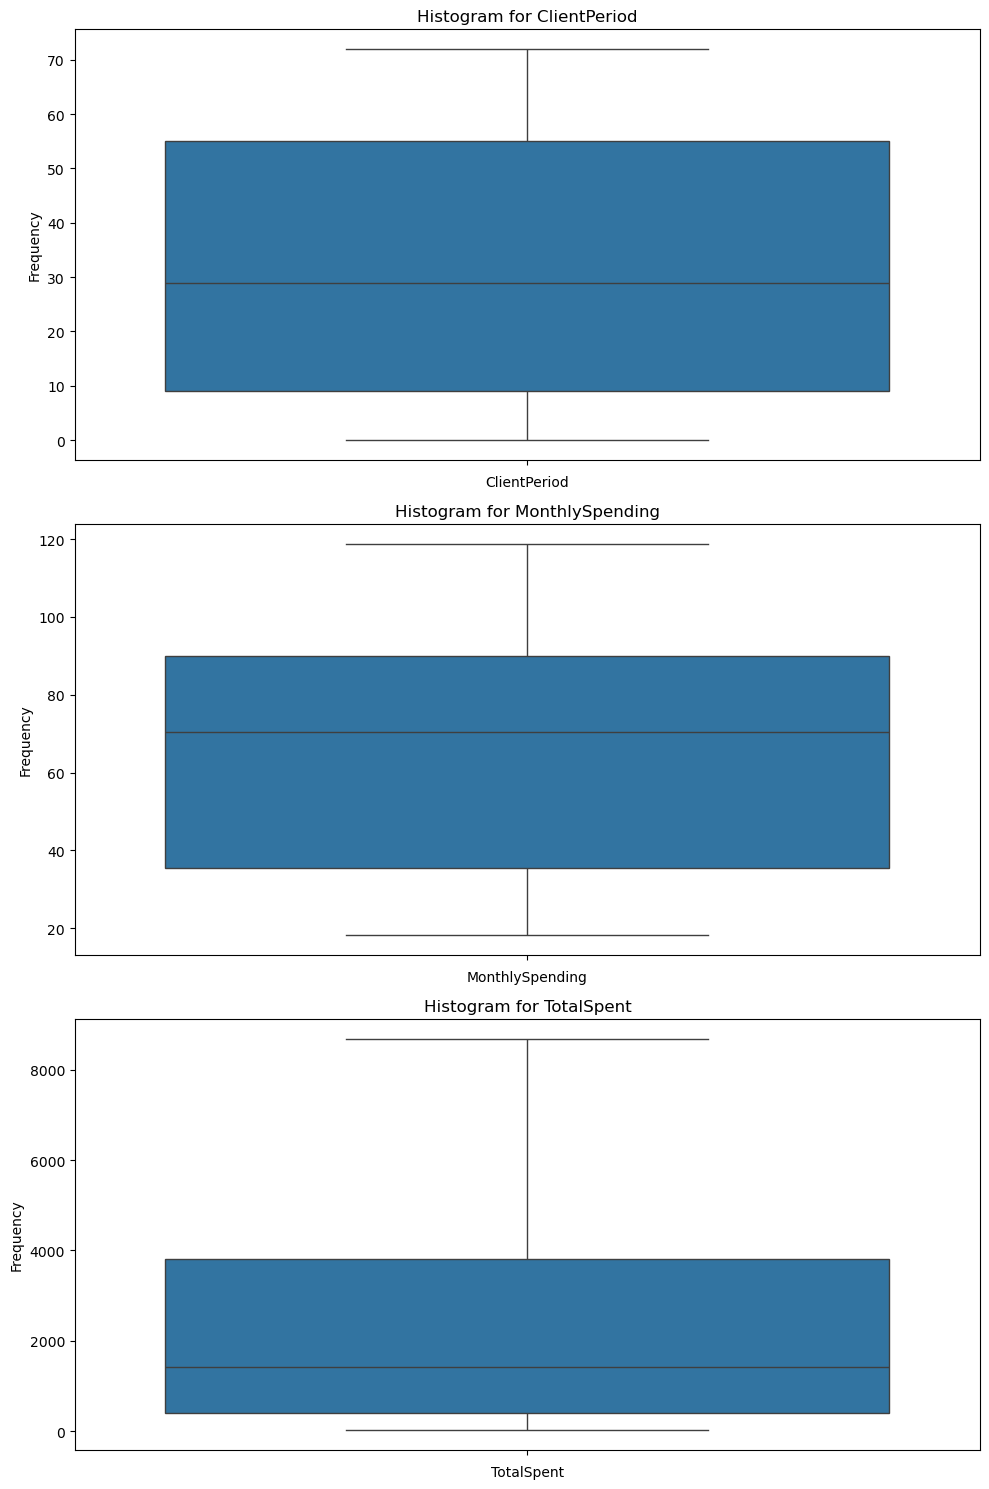

In [18]:
fig, axes = plt.subplots(nrows=num_plots, ncols=1, figsize=(10, num_plots * 5))

for ax, col in zip(axes, num_cols):
    sns.boxplot(data[col], ax=ax)
    ax.set_title(f'Histogram for {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

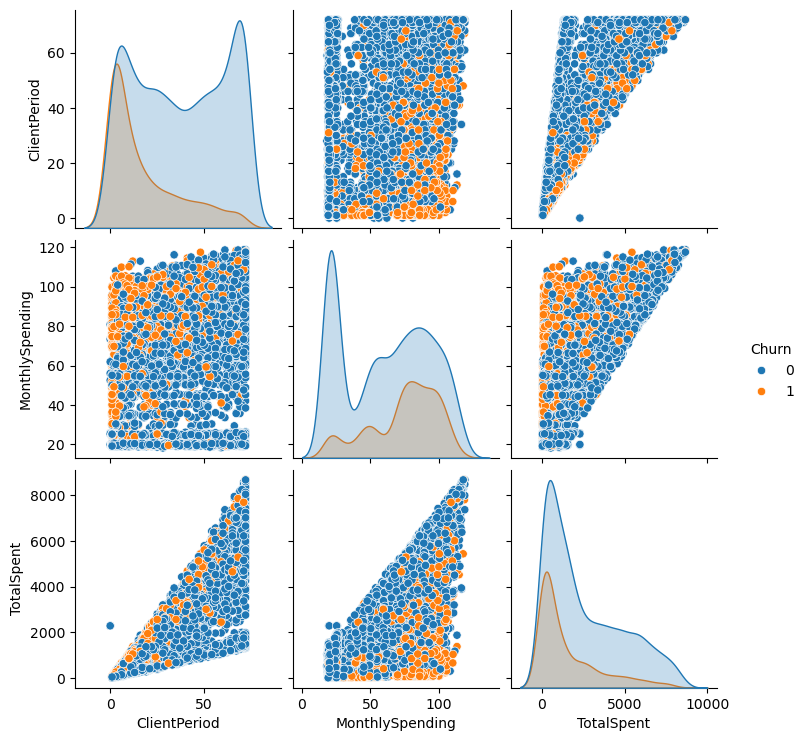

In [19]:
sns.pairplot(data[num_cols + [target_col]], hue=target_col)
plt.show()

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [20]:
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [21]:
data.HasOnlineSecurityService.value_counts()

HasOnlineSecurityService
No                     2604
Yes                    1529
No internet service    1135
Name: count, dtype: int64

In [22]:
data.HasOnlineBackup.value_counts()

HasOnlineBackup
No                     2324
Yes                    1809
No internet service    1135
Name: count, dtype: int64

In [23]:
data.HasDeviceProtection.value_counts()

HasDeviceProtection
No                     2309
Yes                    1824
No internet service    1135
Name: count, dtype: int64

In [24]:
data.HasTechSupportAccess.value_counts()

HasTechSupportAccess
No                     2596
Yes                    1537
No internet service    1135
Name: count, dtype: int64

In [25]:
data.HasMovieSubscription.value_counts()

HasMovieSubscription
No                     2073
Yes                    2060
No internet service    1135
Name: count, dtype: int64

In [26]:
def add_features(data):
    subscriptions = [
        'HasOnlineSecurityService',
        'HasOnlineBackup',
        'HasDeviceProtection',
        'HasTechSupportAccess',
        'HasMovieSubscription'
    ]

    data['HasMultipleSubscriptions'] = data[subscriptions].applymap(lambda x: str(x) == 'Yes').sum(axis=1) > 1
    data['HasMultipleSubscriptions'] = data['HasMultipleSubscriptions'].astype('int64')

    data[data['TotalSpent'] == 0] = 1

    data['MonthlyToTotal'] = data['MonthlySpending'] / data['TotalSpent']
    data['PeriodToMonthly'] = data['ClientPeriod'] / data['MonthlySpending']
    global cat_cols, num_cols
    if 'HasMultipleSubscriptions' not in cat_cols:
        cat_cols.append('HasMultipleSubscriptions')
    if 'MonthlyToTotal' not in num_cols:
        num_cols.append('MonthlyToTotal')
    if 'PeriodToMonthly' not in num_cols:
        num_cols.append('PeriodToMonthly')
    return data

In [27]:
new_data = data.copy()
new_data = add_features(new_data)

C:\Users\pasha\AppData\Local\Temp\ipykernel_3552\999900326.py:10: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  data['HasMultipleSubscriptions'] = data[subscriptions].applymap(lambda x: str(x) == 'Yes').sum(axis=1) > 1


In [28]:
cat_cols

['Sex',
 'IsSeniorCitizen',
 'HasPartner',
 'HasChild',
 'HasPhoneService',
 'HasMultiplePhoneNumbers',
 'HasInternetService',
 'HasOnlineSecurityService',
 'HasOnlineBackup',
 'HasDeviceProtection',
 'HasTechSupportAccess',
 'HasOnlineTV',
 'HasMovieSubscription',
 'HasContractPhone',
 'IsBillingPaperless',
 'PaymentMethod',
 'HasMultipleSubscriptions']

In [29]:
new_data['HasMultipleSubscriptions'].value_counts()

HasMultipleSubscriptions
0    2694
1    2574
Name: count, dtype: int64

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [30]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report

In [31]:
OHE = OneHotEncoder(drop='first')
OHE.fit(new_data[cat_cols])
cat_data_encoded = OHE.transform(new_data[cat_cols]).toarray()
cat_data_encoded = pd.DataFrame(cat_data_encoded, columns=OHE.get_feature_names_out()).reset_index(drop=True)
cat_data_encoded.head()

,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,HasOnlineSecurityService_No internet service,...,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultipleSubscriptions_1
0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [32]:
new_data = new_data.reset_index().drop(columns=['index'])
df_encoded = pd.concat((new_data.drop(columns=cat_cols), cat_data_encoded), axis=1)
df_encoded.head()

,ClientPeriod,MonthlySpending,TotalSpent,Churn,MonthlyToTotal,PeriodToMonthly,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,...,HasOnlineTV_Yes,HasMovieSubscription_No internet service,HasMovieSubscription_Yes,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultipleSubscriptions_1
0,55,19.50,1026.35,0,0.018999,2.820513,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,72,25.85,1872.20,0,0.013807,2.785300,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1,75.90,75.90,1,1.000000,0.013175,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,32,79.30,2570.00,0,0.030856,0.403531,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,60,115.25,6758.45,0,0.017053,0.520607,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [33]:
scaler = RobustScaler()
scaled_data = scaler.fit_transform(df_encoded[num_cols])
scaled_data = pd.DataFrame(scaled_data, columns=df_encoded[num_cols].columns)
scaled_data.head()

,ClientPeriod,MonthlySpending,TotalSpent,MonthlyToTotal,PeriodToMonthly
0,0.565217,-0.934648,-0.115271,-0.165901,3.740210
1,0.934783,-0.818161,0.133269,-0.222025,3.684326
2,-0.608696,0.099977,-0.394546,10.438262,-0.715115
3,0.065217,0.162348,0.338306,-0.037736,-0.095609
4,0.673913,0.821830,1.569018,-0.186943,0.090195


In [34]:
scaled_encoded_data = pd.concat((df_encoded.drop(columns=num_cols), scaled_data), axis=1)

In [35]:
scaled_encoded_data.head()

,Churn,Sex_Male,IsSeniorCitizen_1,HasPartner_Yes,HasChild_Yes,HasPhoneService_Yes,HasMultiplePhoneNumbers_No phone service,HasMultiplePhoneNumbers_Yes,HasInternetService_Fiber optic,HasInternetService_No,...,IsBillingPaperless_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,HasMultipleSubscriptions_1,ClientPeriod,MonthlySpending,TotalSpent,MonthlyToTotal,PeriodToMonthly
0,0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.565217,-0.934648,-0.115271,-0.165901,3.740210
1,0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.934783,-0.818161,0.133269,-0.222025,3.684326
2,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,-0.608696,0.099977,-0.394546,10.438262,-0.715115
3,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.065217,0.162348,0.338306,-0.037736,-0.095609
4,0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.673913,0.821830,1.569018,-0.186943,0.090195


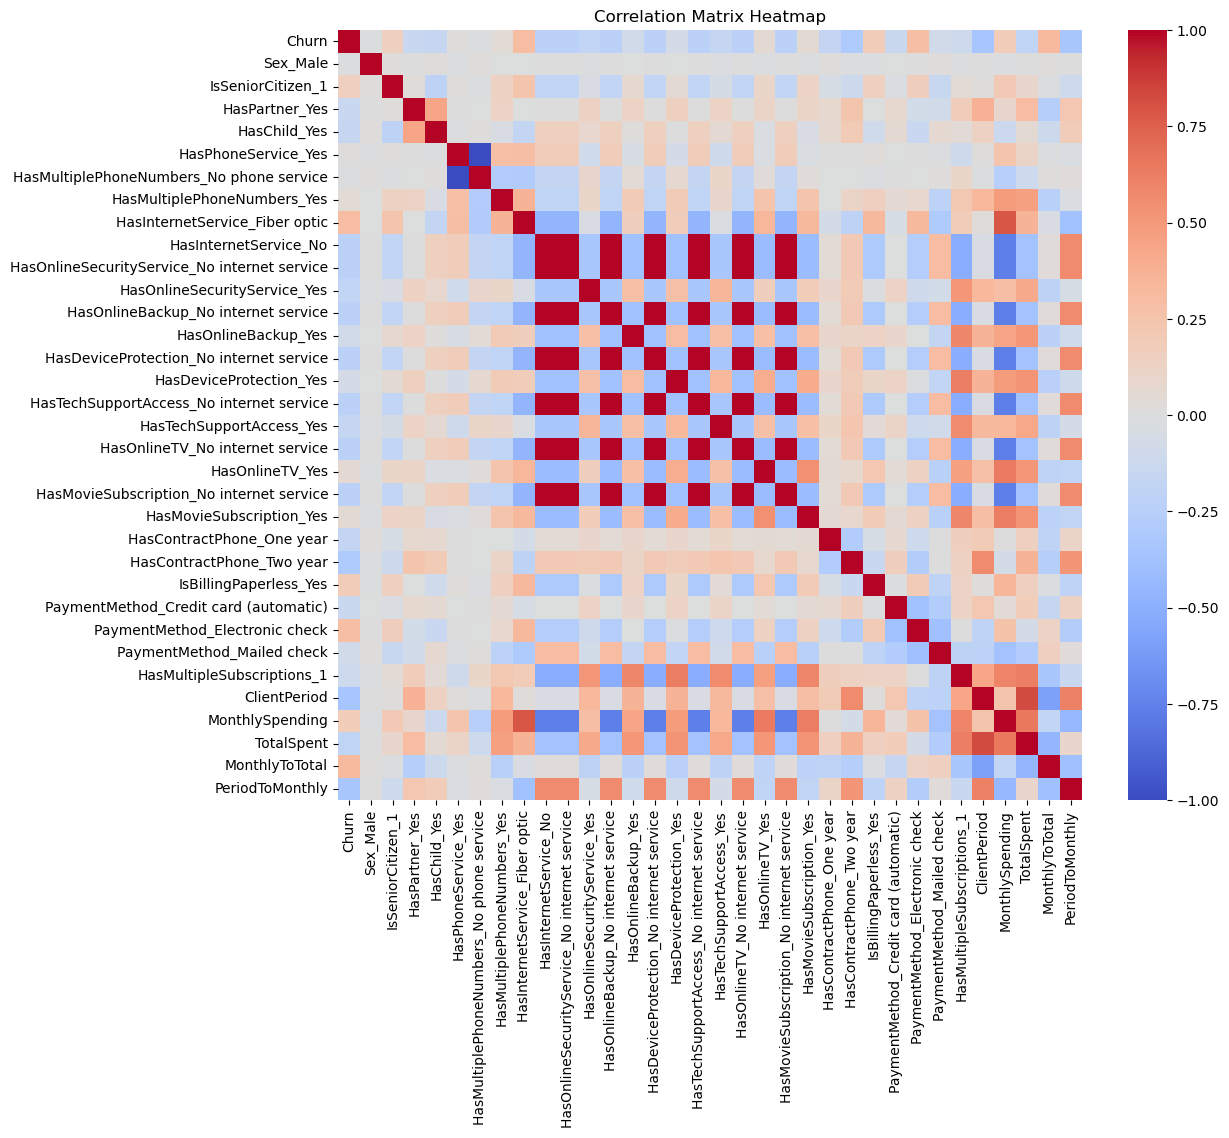

In [36]:
correlation_matrix = scaled_encoded_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [37]:
X = scaled_encoded_data.drop(columns=['Churn']).copy()
y = scaled_encoded_data['Churn'].copy()

In [38]:
model = LogisticRegressionCV(max_iter=500)
scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'{scores.mean()}')

0.8487743263242493


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=52)

In [40]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       784
           1       0.65      0.50      0.57       270

    accuracy                           0.80      1054
   macro avg       0.75      0.71      0.72      1054
weighted avg       0.79      0.80      0.79      1054



In [41]:
model.C_ #roc-auc = 0.8488

array([21.5443469])

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [42]:
!pip3 install catboost

   ---------------------------------------- 0.0/101.7 MB ? eta -:--:--
    --------------------------------------- 1.3/101.7 MB 9.5 MB/s eta 0:00:11
   ---- ----------------------------------- 11.3/101.7 MB 35.2 MB/s eta 0:00:03
   -------- ------------------------------- 21.2/101.7 MB 40.6 MB/s eta 0:00:02
   ------------ --------------------------- 30.7/101.7 MB 41.4 MB/s eta 0:00:02
   --------------- ------------------------ 38.5/101.7 MB 40.2 MB/s eta 0:00:02
   ------------------- -------------------- 49.3/101.7 MB 42.4 MB/s eta 0:00:02
   ------------------------ --------------- 62.4/101.7 MB 45.7 MB/s eta 0:00:01
   ----------------------------- ---------- 74.2/101.7 MB 46.8 MB/s eta 0:00:01
   --------------------------------- ------ 84.7/101.7 MB 47.4 MB/s eta 0:00:01
   -------------------------------------- - 96.7/101.7 MB 48.6 MB/s eta 0:00:01
   --------------------------------------  101.7/101.7 MB 48.4 MB/s eta 0:00:01
   --------------------------------------  101.7/10

In [43]:
new_data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,...,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn,HasMultipleSubscriptions,MonthlyToTotal,PeriodToMonthly
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,...,No internet service,No internet service,No internet service,One year,No,Mailed check,0,0,0.018999,2.820513
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,...,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0,0,0.013807,2.785300
2,1,75.90,75.90,Male,0,No,No,Yes,No,Fiber optic,...,Yes,No,No,Month-to-month,Yes,Electronic check,1,0,1.000000,0.013175
3,32,79.30,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,No,Mailed check,0,0,0.030856,0.403531
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Two year,No,Credit card (automatic),0,1,0.017053,0.520607
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5263,3,30.40,82.15,Male,0,No,No,No,No phone service,DSL,...,Yes,No,No,Month-to-month,No,Electronic check,0,0,0.370055,0.098684
5264,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,...,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0,1,0.020311,1.124859
5265,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,...,Yes,No,No,Month-to-month,No,Mailed check,0,1,1.000000,0.018165
5266,29,76.00,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,...,No,No,No,Month-to-month,Yes,Credit card (automatic),0,0,0.034308,0.381579


In [44]:
import catboost

In [ ]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score

X = new_data.drop(columns=['Churn'])
y = new_data['Churn']

cat_features = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

catboost_model = CatBoostClassifier(cat_features=cat_features, verbose=1)

param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1, 0.03],
    'iterations': [400, 1000],
    'l2_leaf_reg': [3, 5],
}

grid_search = GridSearchCV(estimator=catboost_model,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=5,
                           verbose=1)

grid_search.fit(X, y)

print("Best parameters found: ", grid_search.best_params_)
print("Best ROC-AUC score: ", grid_search.best_score_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
0:	learn: 0.6878489	total: 150ms	remaining: 59.9s
1:	learn: 0.6824260	total: 159ms	remaining: 31.7s
2:	learn: 0.6773431	total: 170ms	remaining: 22.5s
3:	learn: 0.6721852	total: 180ms	remaining: 17.8s
4:	learn: 0.6662551	total: 191ms	remaining: 15.1s
5:	learn: 0.6605109	total: 201ms	remaining: 13.2s
6:	learn: 0.6550673	total: 210ms	remaining: 11.8s
7:	learn: 0.6502082	total: 220ms	remaining: 10.8s
8:	learn: 0.6452926	total: 229ms	remaining: 9.95s
9:	learn: 0.6401891	total: 239ms	remaining: 9.31s
10:	learn: 0.6352363	total: 248ms	remaining: 8.76s
11:	learn: 0.6303224	total: 257ms	remaining: 8.31s
12:	learn: 0.6255389	total: 266ms	remaining: 7.93s
13:	learn: 0.6209382	total: 276ms	remaining: 7.61s
14:	learn: 0.6165263	total: 286ms	remaining: 7.35s
15:	learn: 0.6119872	total: 296ms	remaining: 7.1s
16:	learn: 0.6076297	total: 306ms	remaining: 6.88s
17:	learn: 0.6042251	total: 311ms	remaining: 6.6s
18:	learn: 0.6003118	total: 320m

Анлаки :(
    Best parameters found:  {'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Best ROC-AUC score:  0.8479299167319944

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

# Предсказания

In [ ]:
X = scaled_encoded_data.drop(columns=['Churn']).copy()
y = scaled_encoded_data['Churn'].copy()
best_model = LogisticRegressionCV(max_iter=500)
scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
print(f'{scores.mean()}')
best_model.fit(X, y)

In [ ]:
X.head()

In [ ]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

In [ ]:
X_test['TotalSpent'] = X_test['TotalSpent'].str.strip()
X_test['TotalSpent'] = X_test['TotalSpent'].replace('', np.nan)
X_test['TotalSpent'] = X_test['TotalSpent'].astype('float64')

In [ ]:
X_test.TotalSpent.isna().sum()

In [ ]:
X_test.TotalSpent = X_test.TotalSpent.fillna(new_data.TotalSpent.mean())

In [ ]:
X_test.isna().sum()

In [ ]:
X_test = add_features(X_test)

In [ ]:
X_test.shape

In [ ]:
best_model = grid_search.best_estimator_
submission['Churn'] = best_model.predict_proba(X_test) # catboost
submission['Churn'] = 1 - submission['Churn']
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
cat_data_encoded = OHE.transform(X_test[cat_cols]).toarray()
cat_data_encoded = pd.DataFrame(cat_data_encoded, columns=OHE.get_feature_names_out()).reset_index(drop=True)
X_test = pd.concat((X_test.drop(columns=cat_cols), cat_data_encoded), axis=1)
X_test

In [ ]:
scaled_data = scaler.transform(X_test[num_cols])
scaled_data = pd.DataFrame(scaled_data, columns=df_encoded[num_cols].columns)
X_test = pd.concat((X_test.drop(columns=num_cols), scaled_data), axis=1)

In [ ]:
X_test.head()

In [ ]:
X = scaled_encoded_data.drop(columns=['Churn']).copy()
y = scaled_encoded_data['Churn'].copy()
best_model = LogisticRegressionCV(max_iter=500)
best_model.fit(X, y)
submission['Churn'] = best_model.predict_proba(X_test)# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission['Churn'] = 1 - submission['Churn'] # Перепутаны лейблы
submission.to_csv('./my_submission.csv', index=False)

Лучшее решение отправьте в Stepik.

Борьба с дизбалансом

In [ ]:
!pip3 install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
X = scaled_encoded_data.drop(columns=['Churn']).copy()
y = scaled_encoded_data['Churn'].copy()
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)
best_model = LogisticRegressionCV(max_iter=1000)
scores = cross_val_score(best_model, X_resampled, y_resampled, cv=10, scoring='roc_auc')

In [ ]:
print(scores.mean()) # Скор стал выше, обучим катбуст

In [ ]:
best_model.fit(X_resampled, y_resampled)

{'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 5, 'learning_rate': 0.01}

In [ ]:
model = CatBoostClassifier(verbose=0)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc')
print(scores.mean()) # ?!?!?!?!? data leakage somewhere

In [ ]:
model.fit(X_resampled, y_resampled)

In [ ]:
submission['Churn'] = model.predict_proba(X_test)
submission['Churn'] = 1 - submission['Churn']
submission.to_csv('./my_submission.csv', index=False)

In [ ]:
from imblearn.over_sampling import ADASYN
adasyn = ADASYN(sampling_strategy='minority', random_state=42)
X_resampled, y_resampled = adasyn.fit_resample(X, y)
best_model = LogisticRegressionCV(max_iter=1000)
scores = cross_val_score(best_model, X_resampled, y_resampled, cv=10, scoring='roc_auc')
print(scores.mean())
model = CatBoostClassifier(verbose=0)
scores = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc') # cv = 5 Для скорости
print(scores.mean())

In [ ]:
X_resampled.shape

In [ ]:
model.fit(X_resampled, y_resampled)

In [ ]:
submission['Churn'] = model.predict_proba(X_test)
submission['Churn'] = 1 - submission['Churn']
submission.to_csv('./my_submission.csv', index=False)

# Отчет

В начале работы был исправлен столбик TotalSpent и приведен к численному типу, также были убраны nanы путем заменения на среднее. Далее были построены графики распределений численных данных, распределения целевой переменной (данные не сбалансированы, заметных выбросов в данных необнаружено), а также матрица корреляций сгенерированных и старых признаков.
По полученному датасету были обучени модели ЛогРег и катбуст, ЛогРег выдала достаточно сильный скор, сравнимый к бустингом. Финальный скор: 0.85192 (ЛогРег) и 0.85313 (катбуст). После было принято решение насемплить данных для удаления дизбаланса классов и переобучить модели на полученной выборке. Результаты на тесте стали немного хуже.